## Logistic Regression

In [377]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


# importing the dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['Species'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [378]:
# Species 0 = Iris-setosa, 1 = Iris-versicolor, 2 = Iris-virginica
data['Species'].unique()

array([0, 1, 2])

'Iris-setosa' class is when value of species equal to 0
not - 'Iris-setosa' class is when value of species is 1 or 2

Independent variable of x
-   sepal length (cm)
-   sepal width (cm)
-   petal length (cm)
-   petal width (cm)

In [379]:
#Creating a new column 'Iris-setosa' with condition if species 0 it will 0 while everything else is 1
data['Iris-setosa'] = data['Species'].apply(lambda x: 0 if x == 0 else 1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,Iris-setosa
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [380]:
X = data.iloc[:,[0,1,2,3]].values
y = data.iloc[:,4].values

X = X.reshape(-1, 4)
X = preprocessing.scale(X) # scale the data so that it is easier to fit

X_train, X_test, y_train, y_test = train_test_split(X, 
                y, test_size=0.25, random_state=23)



In [381]:
# fit a model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# make predictions on test data
y_pred = log_reg.predict(X_test).reshape(-1,1)

### Measuring Model Performance


To measure a model's performance, you want to get a sense of overall performance as well as performance for each class. Since the Iris dataset is totally balanced, accuracy is an appropriate measure of performance for the classification overall. An accuracy score is provided with the scikit-learn method as the 'score' attribute.

In [382]:
# use score method to get accuracy of model
score = log_reg.score(X_test, y_test)

print('Accuracy: {}'.format(score))


Accuracy: 0.9736842105263158


You can also check how the model did for different classes. The confusion matrix shows us that the model found instances of the species Versicolor the hardest to classify correctly.  

In [383]:
from sklearn.metrics import confusion_matrix

classes = list(iris.target_names)
conf_mat = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(conf_mat, columns=classes, index=classes)
cm_df

,setosa,versicolor,virginica
setosa,16,0,0
versicolor,0,11,0
virginica,0,1,10


Looking at the confusion matrix is one way of inspecting performance in more detail. Looking at the f1 score,  
precision and recall are another way. The imperfect average f1 score tells us not all instances were classified perfectly, and the per-class f1 scores tells us which classes were the most problematic. 

In [384]:
from sklearn.metrics import f1_score, precision_score, recall_score

# average f1 score
av_f1 = f1_score(y_test, y_pred, average='micro')
print(av_f1)

# f1 score per class
f = f1_score(y_test, y_pred, average=None)
lowest_score = min(f)
hardest_class = classes[list(f).index(lowest_score)]
print('Hardest class:', hardest_class)

0.9736842105263158
Hardest class: virginica


The precision and recall for that species then tell us more. What what went wrong is that not the model was too strict about what instances could be considered Virginica, or perhaps mistook them for another class.

In [385]:
# precision and recall for virginica  
prec = precision_score(y_test == classes.index('virginica'), y_pred == classes.index('virginica'))
rec = recall_score(y_test == classes.index('virginica'), y_pred == classes.index('virginica'))

print('Precision:', prec)
print('Recall:', rec)


Precision: 1.0
Recall: 0.9090909090909091


We could use this information to, for example, decide to collect more instances of this species.

In [386]:
# Prepare features and target variables
X = data.iloc[:, [0, 1, 2, 3]].values
y = data['Iris-setosa'].values

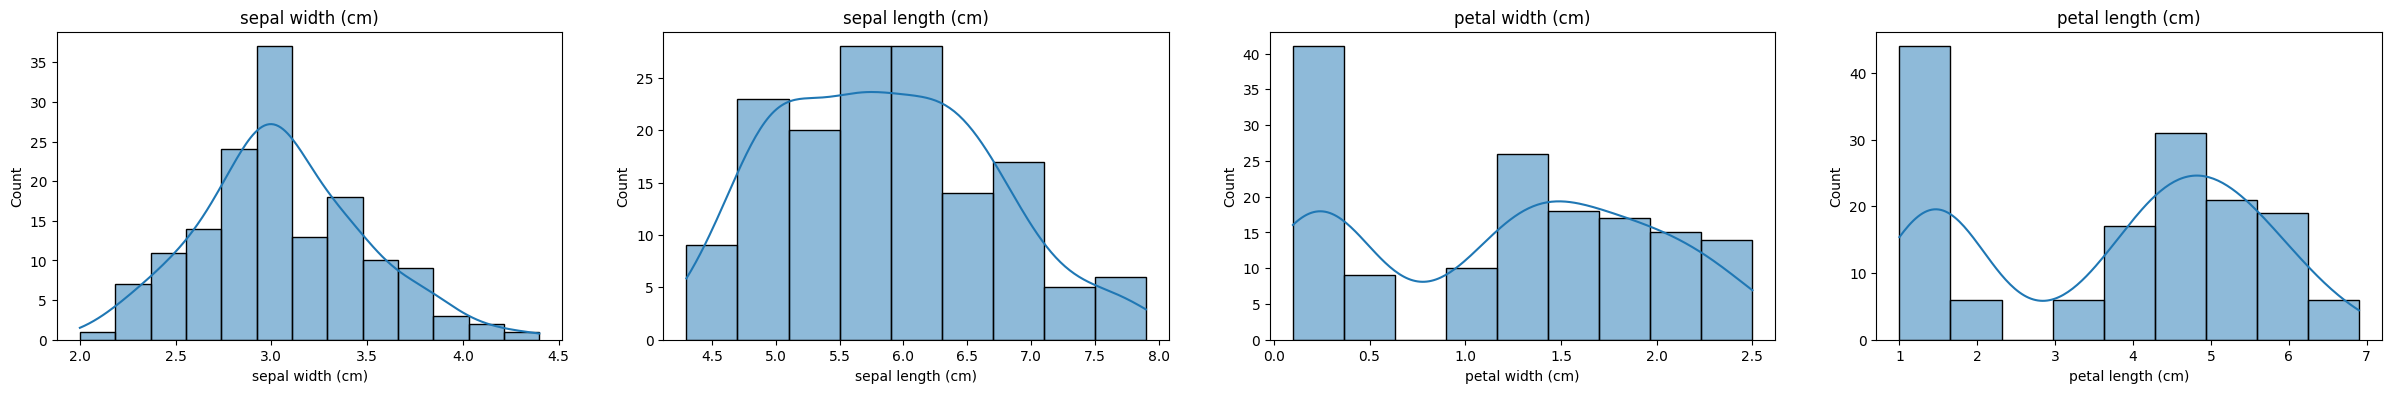

In [387]:
plt.figure(figsize=(30,4))

column_names = [
    'sepal width (cm)',
    'sepal length (cm)',
    'petal width (cm)',
    'petal length (cm)'
]

column_length = len(column_names)

for i, column_names in enumerate(column_names):
    plt.subplot(1, column_length, i + 1)
    sns.histplot(data[column_names], kde=True)
    plt.title(column_names)

plt.show()

None of the independent variable have a gaussian distribution therefore we will StandardScaler() to even out the independent variables

In [388]:
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [389]:
# Prepare features and target variables
X = data.iloc[:, [0, 1, 2, 3]].values
y = data['Iris-setosa'].values

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(conf_matrix, columns = ['Iris-setosa','Non Iris-setosa'], index = [0,1])
conf_matrix


,Iris-setosa,Non Iris-setosa
0,13,0
1,0,25


### Accuracy Formula

The accuracy of a classification model is given by:

$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

where:
-   ( TP ) = True Positives 
-   ( TN ) = True Negatives
-   ( FP ) = False Positives
-   ( FN ) = False Negatives

**True Positives (TP)**: Iris-setosa (13).

**True Negatives (TN):** Iris-setosa (25)

**False Positives (FP):** Iris-setosa (0).

**False Negatives (FN):** Not Iris-setosa (0).

In [390]:
# For binary classification (Iris-setosa vs Not Iris-setosa)
TP = 13
TN = 25
FP = 0
FN = 0

# Calculating accuracy, precision, and recall manually
accuracy_manual = (TP + TN) / (TP + TN + FP + FN)
print(accuracy_manual)


1.0


### Precision Formula

The precision formula of a classification model is given by:

$$ \text{Precision} = \frac{TP}{TP + FP} $$

Where:
-   ( TP ) = True Positives
-   ( FP ) = False Positives


In [391]:
precision_manual = TP / (TP + FP)
print(precision_manual)

1.0


### Recall Formula

The recall formula of a classification model is given by:

$$ \text{Recall} = \frac{TP}{TP + FN} $$
Where:
-   ( TP ) = True Positives
-   ( FN ) = False Negatives

In [392]:
recall_manual = TP / (TP + FN)
print(recall_manual)

1.0
